# Iris, 붖꽃 세 가지 품종 분류하기
Scikit-learn의 Toy Datasets의 한 종류인 iris_dataset을 활용한다.
Dataset의 행은 네 가지 요소의 값(꽃잎(Petal)의 길이와 너비, 꽃받침(Sepal)의 길이와 너비)을 가지고 있다.
세 가지 클래스인 iris setosa, iris versicolor, iris virginica로 구분한다.

먼저 scikit-learn의 데이터셋에서 load_iris 모듈을 불러와서, iris의 객체를 만든다.

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

print(dir(iris))
# dir()는 객체가 어떤 변수와 메서드를 가지고 있는지 나열함
print(iris.keys())

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


iris객체는 아래와 같은 변수와 메서드를 가지고 있다.
['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']

iris의 데이터 구조를 살펴보자.

In [10]:
iris_data = iris.data

print(iris_data.shape)
print(iris.data.ndim)

(150, 4)
2


iris는 150개의 데이터가 각각 4개의 정보를 담고있다.
샘플 데이터의 내부를 살펴보자.

In [25]:
iris_data[:10]

None


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

넘파이 배열의 정보(열)의 종류를 알고싶다.

In [27]:
print(iris_data.dtype.names)

None


이름이 없나보다. 마지막으로 다른 방법을 써보자.

from scipy import stats
stats.describe(dataset)

을 이용해보자.

In [26]:
from scipy import stats
stats.describe(iris_data)



DescribeResult(nobs=150, minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.05733333, 3.758     , 1.19933333]), variance=array([0.68569351, 0.18997942, 3.11627785, 0.58100626]), skewness=array([ 0.31175306,  0.31576711, -0.27212767, -0.10193421]), kurtosis=array([-0.57356795,  0.18097632, -1.39553589, -1.33606741]))

dataset에서 제공하는 freature_names 메서드를 이용하면 이름을 알 수 있다.

In [35]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

꽃잎과 꽃밭침의 길이와 너비를 이용해 품종을 출력하도록 학습시켜야한다.

이때 출력해야하는 정답을 라벨 또는 타겟이라고 한다.
라벨을 타겟으로 설정하자.

In [28]:
iris_label = iris.target
print(iris_label.shape)
iris_label

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

길이는 150개이며 0,1,2의 값을 갖는다.

In [33]:
print(iris.target_names[0], iris.target_names[1], iris.target_names[2])

setosa versicolor virginica


0은 setosa
1은 versicolor
2는 virginica
를 가리킨다.

iris.DESCR의 값도 출력해보자.

In [34]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

DESCR은 데이터셋의 설명이 담겨있다.

파일 이름을 알 수 있는 메서드도 있다.

In [38]:
iris.filename

'iris.csv'

In [39]:
iris_data.ndim

2

Iris 데이터는 2차원이므로 판다스 데이터프레임으로 다뤄볼 것이다.

In [40]:
import pandas as pd

print(pd.__version__)

1.4.3


In [41]:
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


데이터 프레임객체에 iris_data를 넣고, 열의 이름을 feature_names을 넣었다.

데이터에 인덱스가 보이고, 정보들에 이름이 보인다.
다루기 편하도록 label이란 칼럼을 추가해주자

In [42]:
iris_df["label"] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


이 데이터프레임이 머신러닝의 규칙을 만들어낼 정답지이다.
새롭게 발생하는 정보들(꽃잎과 꽃받침의 길이와 너비)만 안다면, 정답을 예측할 수 있다.

머신러닝에 입력되는 데이터는 feature이며, 맞혀야하는 데이터가 label 또는 target이라고 부른다.
변수명은 주로 feature는 X, label 및 target은 y로 사용한다.

# Train과 Test
머신러닝 모델을 학습시키려면 한 가지 장치가 필요하다.

학습에 사용하는 Training dataset과 모델 성능을 평가하는 test dataset으로 나눠야 한다.

scikit-learn에서 제공하는 train_test_split이라는 함수를 사용하면 간단하다.

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  120 , X_test 개수:  30


train_test_split 함수는 feature와 label 등 2개를 입력받아 train_feature, test_feature, train_label, test_label 등 4개로 반환한다.

여기서 추가로 test_size를 20%로 설정하였다.
80%인 120개가 X_train으로 20%인 30개가 X_test로 분리되었다.

마지막 random_state는 재현을 위해 랜덤의 규칙을 정한것일뿐, 랜덤하게 추출합니다.

In [45]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


Feature는 train과 test 모두 2차원이지만,
label은 1차원이다.

label에 대해 좀 더 자세히 알아보자.

In [47]:
y_train, y_test

(array([2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2, 0, 0, 0,
        2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0,
        1, 2, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2,
        0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0, 0, 1,
        1, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 2,
        0, 2, 1, 1, 0, 2, 1, 2, 1, 0]),
 array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
        1, 2, 2, 2, 1, 1, 2, 2]))

처음 label을 확인했을 때와 다르게 0,1,2가 무작위로 섞여있다.

# 지도학습과 비지도학습

머신러닝은 크게 Supervised learning, 지도학습, Unsupervised learning, 비지도학습으로 구분된다.

정답이 있는 문제에 대해 학습하는 것이 지도학습이며, 정답이 없는 문제를 학습하는 것이 비지도학습이다.
Iris 품종 문제는 지도학습에 해당한다.

지도학습은 또 Classification, 분류와 Regression, 회귀 두 가지로 나눈다.
분류는 데이터를 특정 카테고리로 예측하며, 회귀는 데이터에 따라 특정 영역의 수치로 예측하는 것이다.

Iris 품종 문제는 분류에 대한 지도학습이다.

의사결정나무인 DecisionTree 방식을 먼저 적용해보자.

In [50]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

classifier


의사결정나무분류기를 import해서 decision_tree라는 변수에 선언한다.

In [58]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

의사결정나무 변수에 fit 메서드를 이용해 train dataset을 입력해 모델링한다.
fitted 의사결정나무 모델에 X_test 파라미터를 넣어 y_test와 비교하여 정확도를 계산한다.

In [59]:
y_pred = decision_tree.predict(X_test)
y_pred

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2])

In [61]:
y_test

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 2])

In [60]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9

# 첫 번째 머신러닝 실습, 간단하고도 빠르게


In [62]:
# (1) 필요한 모듈 import
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# (2) 데이터 준비
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

# (3) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

# (4) 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.83      0.87        12
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



분류리포트를 보면, 카테고리를 구분하여 precision, recall, f1-score, support를 출력한다.
각 항목에 대해서 알아보자

Precision은 정밀도로
양성 클래스로 예측한 샘플(TP+FP)중 양성 클래스에 속하는 샘플(TP)의 샘플 수의 비율이다.

Recall은 재현율로
실제 양성클래스에 속한 샘플(TP+FN)중 양성 클래스라고 예측한 샘플(TP) 샘플 수의 비율을 나타낸다.

Accuracy는 정확도로
전체 샘플 중 맞게 예측한 샘플 수 의 비율이다.

f1-score는 precision과 recall의 가중 조화평균(weight harmonic average)를 F(beta)-score라 한다.
beta가 1인 계산식의 결과를 f1-score라 한다.

f1-score
2 * precision * recall / (precision + recall)

support는 각 label의 실제 샘플 개수다.

추가로 macro avg, weighted avg에 대해 알아보면

macro avg는 평균에 평균을 내는 단순평균으로 각 분류의 f1-score를 평균낸다.
weighted avg는 전체샘플 중 해당 분류의 샘플 수를 당 분류의 평균과 곱해 합산한 결과로
샘플이 많이 담긴 곳에 영향을 더 준다.

# Random Forest 모델링

Decision Tree를 여러 개 모아 놓은 것이 Random Forest다.

단일 모델을 여러 개 사용하는 방법으로 모델 한개만 사용할 때 처럼, 결정경계가 데이터 축과 수직이 되지 않도록 한다.
이 때 합쳐놓는 기법을 앙상블, Ensemble 기법이라 한다.

여러 개의 정보 중 무작위로 일부 선택해 의사결정 트리를 만들고, 또 무작위의 트리를 만들어 여러 트리를 만들고 의견을 다수결로 정한다.

In [63]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=21)

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



# SVM 모델

Support Vector Machine은 Support Vector와 Hyperplane(초평면)을 이용해서 분류를 수행하는 대표적인 선형분류 알고리즘이다.

2차원 공간에서 (두 개의 클래스만 존재할 때)
Decision Boundary(결정경계), 두 개의 클래스를 구분해주는 선
Support vector, Decision boundary에 가까이 있는 데이터
Margin, Decision boundary와 support vector 사이의 거리
  margin이 넓을 수록 모델의 robustness가 커진다.
Kernel Trick, 저차원의 공간을 고차원의 공간으로 매핑해주는 과정으로 데이터가 linearly separable하지 않을 경우 고차원으로 이동시켜 linearly separable하게 만든다.
cost, Decision boundary와 margin의 간격 결정한다. cost가 높으면 margin이 좁아지고 train error가 잦아진다. cost가 낮으면 margin이 넓어지고 train error가 커진다.
γ(gamma), train data당 영향을 미치는 범위 결정. γ가 커지면 영향을 미치는 범위가 줄어들고, Decision boundary에 가까이 있는 데이터만이 선의 굴곡에 영향을 준다. 따라서 구불어진 decision boundary를 얻는다. γ가 작아지면 데이터가 영향을 미치는 범위가 커지고 대부분의 데이터가 decision boundary에 영향을 준다. 따라서 직선에 가까워진다.(오버피팅이 초래할 가능성이 높아진다)


In [65]:
from sklearn import svm
svm_model = svm.SVC()

print(svm_model._estimator_type)

classifier


In [92]:
# 코드를 입력하세요
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      0.83      0.87        12
           2       0.75      0.86      0.80         7

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.89        30
weighted avg       0.91      0.90      0.90        30



# SGDClassifier
stochastic Gradient Descent, SGD는 배치 크기가 1인 경사하강법 알고리즘입니다. 즉, 확률적 경사하강법은 dataset에서 무작위로 균일하게 선택한 하나의 데이터 포인트를 이용하여 각 단계의 예측 경사를 계산합니다.

경사하강법에서 배치는 단일 반복에서 기울기를 계산하는데 사용하는 샘플의 총 개수입니다.
Gradient Descent에서의 배치는 전체 dataset이라고 가정한다.

따라서 dataset에서 샘플을 무작위로 선택하여 평균을 추정하는 것처럼, SGD 확률적 경사하강법은 반복당 하나의 샘플(배치 크기 1)만 사용합니다.

대규모 샘플에서 빠르게 계산할 수 있지만, 반복의 횟수가 충분하지 않으면 노이즈가 매우 심하다.
이러한 단점을 극복하고자 10개에서 1,000개 사이의 샘플을 무작위로 추출하는 미니 배치 SGD를 활용하기도 한다.

In [78]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

print(sgd_model._estimator_type)

classifier


In [102]:
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.86      1.00      0.92        12
           2       1.00      0.71      0.83         7

    accuracy                           0.93        30
   macro avg       0.95      0.90      0.92        30
weighted avg       0.94      0.93      0.93        30



SGD 예문에서 report에 출력값이 매번 바뀐다.

# Logistic Regression 모델

가장 널리 알려진 선형 분류 알고리즘인 로지스틱 회귀는 softmax 함수를 사용한 다중 클래스 분류 알고리즘이며, softmax regression이라고도 한다.

## Softmax function
클래스가 N개일 때, N차원의 백터가 각 클래스가 정답일 확률을 표현하도록 정규화를 해주는 함수이다.
N차원의 벡터를 입력받아 M개의 클래스를 예측하는 경우의 softmax regression은 출력은 M차원 백터고 출력 M차원은 특정 클래스일 확률이다. 학습과정에서 N차원의 백터에서 M차원 값에 영향을 줄 때 최적 가중치와 편향을 찾는다.

In [103]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

print(logistic_model._estimator_type)

classifier


In [107]:
logistic_model.fit(X_train,y_train)
y_pred = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



# 정확도에는 함정이 있다.

손글씨 데이터인 MNIST dataset을 통해 확인해보자.

In [108]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

iris데이터와 비슷한 정보들이 보인다.
가장 중요한 data를 확인해보자.

In [112]:
digits_data = digits.data
digits_data.shape

2

1797개의 데이터는 64개의 정보를 같는 2차원 dataset이다.

In [113]:
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

인덱스 0의 데이터는 64개 float을 갖는 1차원 배열이다.

matplotlib으로 이미지를 출력해보자.

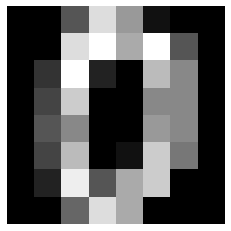

In [114]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[0].reshape(8,8), cmap='gray')
plt.axis('off')
plt.show()

0처럼 생긴 8*8 크기의 이미지가 출력됐다.

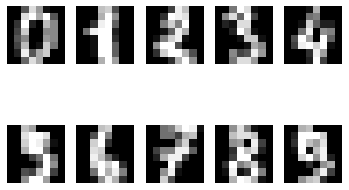

In [115]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

0부터 9까지 10개의 숫자 이미지가 출력됐다.

그럼 dataset의 label도 자세히 들여다보자.

In [117]:
digits_label = digits.target
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
1797개 데이터의 1차원 배열로, 20개를 인덱스 순으로 출력해보면, 0부터 9까지 값을 반복하고 있다.

이미지 데이터가 3인지 아닌지를 확인하고자 할 경우를 생각해서 값이 3이면 3을 그대로 저장하고, 3이 아니면 0을 만들어서 새로운 라벨에 저장해보자.

In [119]:
new_label = [3 if i == 3 else 0 for i in digits_label]
new_label[:20]

[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]

이제 이 문제를 다시 풀기 위해 Decision Tree를 학습시켜보자.

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

decition_tree_3 = DecisionTreeClassifier(random_state=32)
decition_tree_3.fit(X_train, y_train)
y_pred = decition_tree_3.predict(X_test)
print(classification_report(y_test,y_pred))

accuracy = accuracy_score(y_test, y_pred)
accuracy

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



0.8555555555555555

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    new_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

decition_tree_3 = DecisionTreeClassifier(random_state=32)
decition_tree_3.fit(X_train, y_train)
y_pred = decition_tree_3.predict(X_test)
print(classification_report(y_test,y_pred))

accuracy = accuracy_score(y_test, y_pred)
accuracy

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       326
           3       0.77      0.88      0.82        34

    accuracy                           0.96       360
   macro avg       0.88      0.93      0.90       360
weighted avg       0.97      0.96      0.96       360



0.9638888888888889

3이 아니면 0으로 변환시킨 new_label로 분리해서 훈련시킨 모델의 정확도가 96.3%가 나왔다.
기존의 정확도가 85.6%가 나온거에 비하면 크게 증가했다. 이러한 이유는
불균형한 데이터가 되었기 때문이다. 학습 없이 정답을 모두 0으로만 선택해도 정확도가 90%가량 나오는 자료이기 때문이다.

In [124]:
fake_pred = [0] * len(y_pred)

accuracy = accuracy_score(y_test, fake_pred)
accuracy

0.9055555555555556

# 내가 만든 모델은 얼마나 똑똑한가?

정확도는 전체 데이터 중 맞은 데이터를 확인한다.
음성 데이터를 얼마나 안 틀렸느냐도 중요한 경우가 있다. 코로나 바이러스 감염 진단과 같은 경우는 실제 음성인데 양성으로 오진하는 건 환자에게는 다행이지만 양성을 음성이라고 오진하는 경우 환자에게 치명적이다.

정답과 오답을 구분하여 표현하는 방법을 오차 행렬, Confusion matrix라 한다.

In [125]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[317,   9],
       [  4,  30]])

confusion_matrix배열을 살펴보자
317의 값은 TP의 숫자를 보여준다. 2열의 값은 으로는 FN이다.
2행 1열의 값인 4는 FP, 2열은 TN이다.

손글씨 문제에서 0을 Positive로 3을 Negative로 보여준다.

fake_pred 가짜 예측값은 어떤가?

In [126]:
confusion_matrix(y_test, fake_pred)

array([[326,   0],
       [ 34,   0]])

fake_pred의 값이 모두 0이기에 모두 TP, NP에 쏠려있다.
분류표를 살펴보자


In [127]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       326
           3       0.77      0.88      0.82        34

    accuracy                           0.96       360
   macro avg       0.88      0.93      0.90       360
weighted avg       0.97      0.96      0.96       360



0에 대한 precision, recall 모두 잘 나왔지만 3에 대해서는 적은 샘플 수 때문인지 다소 낮았다.

거짓 예측값의 분류표는 어떨까

In [128]:
print(classification_report(y_test, fake_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       326
           3       0.00      0.00      0.00        34

    accuracy                           0.91       360
   macro avg       0.45      0.50      0.48       360
weighted avg       0.82      0.91      0.86       360



0의 예측값은 매우 높지만, 3에 대한 결과는 하나도 맞추지 못해 0이다. 따라서 가중치평균을 하지 않은 평균 정확도는 매우 낮아졌다.

양쪽의 정확도를 다시 확인해보자.

In [129]:
accuracy_score(y_test, y_pred), accuracy_score(y_test, fake_pred)

(0.9638888888888889, 0.9055555555555556)

모델의 성능을 정확도만으로 평가하면 이런 경우를 거르지 못할 수 있다.

# 프로젝트 1 손글씨를 분류해보자.

라이브러리 버전을 확인하자


In [130]:
import sklearn

print(sklearn.__version__)

1.1.2


사이킷런에서 필요한 모듈들을 임포트한다.

In [131]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## load_digits 메서드로 데이터를 준비하자

In [138]:
handscript = load_digits()
print(handscript.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## 데이터 이해하기
1. Feature Data 지정하기
2. Label Data 지정하기
3. Target Names 출력해보기
4. 데이터 Describe 해보기


In [152]:
print(handscript.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [156]:
print(handscript.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [146]:
print(handscript.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


손글씨 데이터의 값은 8*8의 16레벨의 값이다.

In [159]:
print(handscript.target)
print(len(handscript.target))
print(handscript.target[:20])

[0 1 2 ... 8 9 8]
1797
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


타겟은 1797개의 샘플이 0~9까지의 값을 갖고 있다.

In [151]:
handscript.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

타겟의 이름은 0~9의 숫자이다.

그럼 이제 trainset과 testset을 분리해보자.

In [161]:
X_train, X_test, y_train, y_test = train_test_split(handscript.data, handscript.target, test_size = 0.2, random_state = 32)

In [162]:
print(len(X_train), len(X_test))

1437 360


# 다양한 모델로 학습시켜보자.
1. Decision Tree
2. Random Forest
3. SVM
4. SGD Classifier
5. Logistic regression


### Decision tree for handscipt

In [183]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=32)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        38
           1       0.75      0.83      0.79        36
           2       0.75      0.84      0.79        32
           3       0.92      0.86      0.89        56
           4       0.85      0.90      0.88        31
           5       0.92      0.97      0.95        36
           6       0.97      0.94      0.96        34
           7       0.94      0.88      0.91        34
           8       0.88      0.78      0.82        27
           9       0.79      0.83      0.81        36

    accuracy                           0.88       360
   macro avg       0.88      0.87      0.87       360
weighted avg       0.88      0.88      0.88       360



0.875

### Random Forest


In [184]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=32)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.97      1.00      0.99        36
           2       0.97      1.00      0.98        32
           3       1.00      1.00      1.00        56
           4       1.00      0.97      0.98        31
           5       1.00      0.97      0.99        36
           6       1.00      1.00      1.00        34
           7       0.97      1.00      0.99        34
           8       0.96      0.89      0.92        27
           9       0.97      1.00      0.99        36

    accuracy                           0.99       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.99      0.99      0.99       360



0.9861111111111112

### SVM


In [187]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=32)
svm_clf.fit(X_train,y_train)
y_pred = svm_clf.predict(X_test)

print(classification_report(y_test,y_pred))
confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        56
           4       1.00      0.97      0.98        31
           5       1.00      0.97      0.99        36
           6       1.00      1.00      1.00        34
           7       1.00      1.00      1.00        34
           8       1.00      1.00      1.00        27
           9       0.95      1.00      0.97        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



0.9944444444444445

### SGD Classifier


In [188]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=32)
sgd_clf.fit(X_train,y_train)
y_pred = sgd_clf.predict(X_test)

print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.78      0.88        36
           2       1.00      0.97      0.98        32
           3       0.98      0.95      0.96        56
           4       1.00      0.97      0.98        31
           5       0.97      0.94      0.96        36
           6       1.00      1.00      1.00        34
           7       1.00      0.97      0.99        34
           8       0.75      1.00      0.86        27
           9       0.86      1.00      0.92        36

    accuracy                           0.95       360
   macro avg       0.96      0.95      0.95       360
weighted avg       0.96      0.95      0.95       360



0.9527777777777777

### Logistic Regression


In [189]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=32,max_iter=50)
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)

print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        38
           1       0.95      0.97      0.96        36
           2       1.00      1.00      1.00        32
           3       1.00      0.98      0.99        56
           4       1.00      0.97      0.98        31
           5       0.89      0.94      0.92        36
           6       1.00      1.00      1.00        34
           7       1.00      1.00      1.00        34
           8       0.96      0.96      0.96        27
           9       0.92      1.00      0.96        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



/Users/taehwan/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9722222222222222

# 모델을 평가해보기

sklearn.metrics에서 제공하는
classfication_report와 confusion_matrix, accuracy_score 세 가지 평가지표를 확인해봤는데
분류 숫자가 많아서 matrix는 보기 어렵다.
숫자를 인식해서 출력해야하는데, 최대한 많은 수를 정확하게 인식해서 출력해주는 것이 중요하기에 accuracy_score를 보는 것이 좋겠다.
가장 높은 svm의 방식이 가장 우수해보인다.

또한 개별적인 숫자의 정확도를 확인하기 위해서는 Classification_report를 확인하는 것이 좋겠다.
svm모델의 경우, report로 자세히 보면 4,5에서 f1_score가 적게 나오고 있다. 그러면 4,5에 인풋데이터를 늘리거나 지도학습을 강화하거나 할 수 있겠다.

그리고 오류가 어느 숫자로 판별해 FN이 되었는지 확인하기 위해서는 matrix를 보면 좋겠다.


# 프로젝트2 와인을 분류해봅시다.


In [195]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## 데이터 준비하기
load_wine

In [196]:
wineset = load_wine()

## 데이터 이해하기

In [197]:
X = wineset.data
y = wineset.target
print(wineset.target_names)
wineset.DESCR

['class_0' 'class_1' 'class_2']


'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:                          1.36  3.23    2.36  0.27\

train, test 데이터 분리

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=32)

### Decision tree


In [206]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=32)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       0.89      0.80      0.84        10
           2       0.90      0.90      0.90        10

    accuracy                           0.92        36
   macro avg       0.91      0.90      0.90        36
weighted avg       0.92      0.92      0.91        36

[[16  0  0]
 [ 1  8  1]
 [ 0  1  9]]


0.9166666666666666

### Random forest


In [217]:
from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier(random_state=32)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

[[16  0  0]
 [ 0  9  1]
 [ 0  0 10]]


0.9722222222222222

### SVM


In [235]:
from sklearn.svm import SVC


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=5)

svm_clf = SVC(random_state=5)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.86      0.71      0.77        17
           1       0.69      0.82      0.75        11
           2       0.44      0.50      0.47         8

    accuracy                           0.69        36
   macro avg       0.66      0.67      0.66        36
weighted avg       0.72      0.69      0.70        36

[[12  0  5]
 [ 2  9  0]
 [ 0  4  4]]


0.6944444444444444

### SGD Classifier


In [242]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=3)
sgd_clf.fit(X_train,y_train)
y_pred = sgd_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.76      0.94      0.84        17
           1       0.80      0.36      0.50        11
           2       0.40      0.50      0.44         8

    accuracy                           0.67        36
   macro avg       0.65      0.60      0.60        36
weighted avg       0.69      0.67      0.65        36

[[16  0  1]
 [ 2  4  5]
 [ 3  1  4]]


0.6666666666666666

### Logistic Regression


In [212]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state =32, max_iter=300)
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.94        36
   macro avg       0.93      0.93      0.93        36
weighted avg       0.94      0.94      0.94        36

[[16  0  0]
 [ 0  9  1]
 [ 0  1  9]]


/Users/taehwan/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9444444444444444

## 모델 평가하기


SVM 모델과 SGD 모델이 3가지로 분류해내지 못했다.

random_state의 값을 바꾸면 다시 분류가 되기도한다. 완전하게 이해되진 않지만
적은 샘플 수때문에 이런 일이 발생하지 않나 싶다.

우선 SVM과 SGD에서는 적은 샘플에 적합하지 않아 보인다.

# 프로젝트3, 유방암 진단

In [245]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### 데이터 준비


In [246]:
breast_cancer = load_breast_cancer()

### 데이터 이해하기


In [247]:
X = breast_cancer.data
y = breast_cancer.target
print(breast_cancer.target_names)
print(breast_cancer.DESCR)

['malignant' 'benign']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instanc

### train, test 데이터 분리


In [249]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=32)

### 다양한 모델로 학습시켜보기



### Decision Tree

In [251]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=32)
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        44
           1       0.90      0.90      0.90        70

    accuracy                           0.88       114
   macro avg       0.87      0.87      0.87       114
weighted avg       0.88      0.88      0.88       114

[[37  7]
 [ 7 63]]


0.8771929824561403

### Random Forest

In [253]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=32)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        44
           1       0.96      0.94      0.95        70

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

[[41  3]
 [ 4 66]]


0.9385964912280702

### SVM

In [255]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=32)
svm_clf.fit(X_train,y_train)
y_pred = svm_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.91      0.73      0.81        44
           1       0.85      0.96      0.90        70

    accuracy                           0.87       114
   macro avg       0.88      0.84      0.85       114
weighted avg       0.87      0.87      0.86       114

[[32 12]
 [ 3 67]]


0.868421052631579

### SGD Classifier

In [257]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=32)
sgd_clf.fit(X_train, y_train)
y_pred = sgd_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        44
           1       0.93      0.91      0.92        70

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114

[[39  5]
 [ 6 64]]


0.9035087719298246

### Logistic Regression

In [265]:
from sklearn.linear_model import LogisticRegression

lg_clf = LogisticRegression(random_state = 32, max_iter=300)
lg_clf.fit(X_train, y_train)
y_pred = lg_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)


              precision    recall  f1-score   support

           0       0.89      0.89      0.89        44
           1       0.93      0.93      0.93        70

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114

[[39  5]
 [ 5 65]]


/Users/taehwan/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9122807017543859

## 모델평가



Acurracy_score는 랜덤포레스트 모델이 93점 대로 가장 높았다.

유방암은 악성(class_0)을 양성(class_1)으로 판단하지 않도록 최적화 하는 것이 중요하다.
따라서 precision보다 class_0의 recall이 높은 값이여야한다.

class_0의 recall 값
decision_tree 0.84
random_forest 0.93
svm 0.73
sgd 0.89
logistic_regression 0.89

랜덤포레스트가 정확도 및 class_0의 recall 모두 최우수였기에 이번 데이터 분석에 효과적인 모델이라고 볼 수 있다.

